(88, 7) (88,)
(38, 7) (38,)

Entrenamiento del modelo finalizado


Precisión del modelo KNN: 0.79



['Adultos', 'Ancianos', 'infantes', 'jovenes']





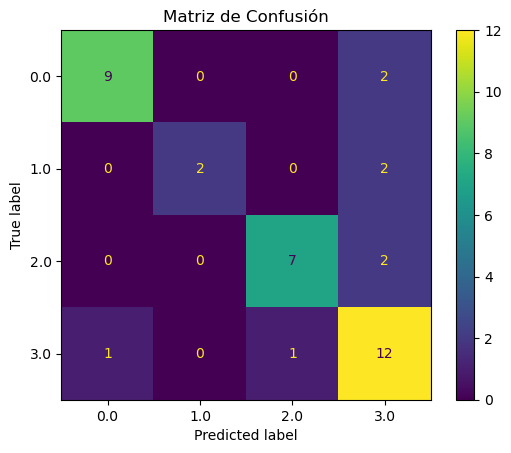


Classification Report:

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       1.00      0.50      0.67         4
         2.0       0.88      0.78      0.82         9
         3.0       0.67      0.86      0.75        14

    accuracy                           0.79        38
   macro avg       0.86      0.74      0.77        38
weighted avg       0.82      0.79      0.79        38




In [16]:
import os
import numpy as np
import librosa.display
from scipy.stats import skew
import librosa
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la ruta al directorio donde se encuentran los audios
extracted_dir = extracted_dir = r'D:\ADMIN\Music\Audios'
    
#Crear una lista de todas las categorías (nombres de carpetas)
categories = os.listdir(extracted_dir)

# Crear diccionario para mapear etiquetas a índices
label_to_index = {category: i for i, category in enumerate(categories)}

# Inicializar listas para audios y etiquetas
audios = []
labels = []

Muestreo = 50000  # Longitud de datos del archivo de sonido

# Recorrer todas las categorías
for category in categories:
    category_dir = os.path.join(extracted_dir, category)
    for filename in os.listdir(category_dir):
        audio_path = os.path.join(category_dir, filename)
        Senal, sr = librosa.load(audio_path)
        Senal_New = np.resize(Senal, Muestreo)
        audios.append(Senal_New)
        labels.append(label_to_index[category])

# Convertir las listas en matrices numpy
audios = np.array(audios)
labels = np.array(labels)

# Matriz de características
Total_caracteristicas = 7  # Cantidad de descriptores
Matriz_caracteristica = np.zeros((len(audios), Total_caracteristicas + 1))  # Características + etiquetas

# Extracción de características
for i in range(len(audios)):
    Varianza = np.var(audios[i])
    Desviacion = np.std(audios[i])
    rms_amplitude = np.sqrt(np.mean(np.square(audios[i])))
    zero_crossings = np.where(np.diff(np.sign(audios[i])))[0]
    zcr = len(zero_crossings)
    skewness = skew(audios[i])
    Magnitud, phase = librosa.magphase(librosa.stft(audios[i]))
    RMS_vector = librosa.feature.rms(S=Magnitud)
    RMS = RMS_vector.mean()
    Times_vector = librosa.times_like(RMS_vector)
    Times = Times_vector.mean()

    Matriz_caracteristica[i, 0] = Varianza
    Matriz_caracteristica[i, 1] = Desviacion
    Matriz_caracteristica[i, 2] = rms_amplitude
    Matriz_caracteristica[i, 3] = zcr
    Matriz_caracteristica[i, 4] = skewness
    Matriz_caracteristica[i, 5] = RMS
    Matriz_caracteristica[i, 6] = Times

    Matriz_caracteristica[i, 7] = labels[i]

# Dividiendo el dataset en variables de entrada (X) y salida (Y)
X = Matriz_caracteristica[:, :-1]
Y = Matriz_caracteristica[:, -1]

# Dividiendo el conjunto de datos
Indices = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=18)
for train_index, test_index in Indices.split(X, Y):
    X_train, X_test = X[train_index, :], X[test_index, :]
    Y_train, Y_test = Y[train_index], Y[test_index]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Normalizando los datos
scaler = StandardScaler()  # Este método no altera la desviación estándar, garantiza que los datos queden correctamente distribuidos
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Implementando un clasificador por comparación (KNN)
# Inicializar el clasificador KNN
Modelo_knn = KNN(n_neighbors=3)

# Entrenar el clasificador KNN con el conjunto de entrenamiento
Modelo_knn.fit(X_train_normalized, Y_train)

# Métricas de evaluación
Y_pred = Modelo_knn.predict(X_test_normalized)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Mostrar resultados
print('==================\n\nEntrenamiento del modelo finalizado\n\n==================\n')
print(f"Precisión del modelo KNN: {accuracy:.2f}\n\n==================\n\n")
print(f"{categories}\n\n==================\n\n")

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Modelo_knn.classes_)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

print(f'==================\n\nClassification Report:\n\n{report}\n\n==================')


In [14]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]


In [17]:
#Guardando el modelo
import joblib
joblib.dump(Modelo_knn, 'D:\ADMIN\Music\Audios\Modelo_Audio.pkl')

['D:\\ADMIN\\Music\\Audios\\Modelo_Audio.pkl']

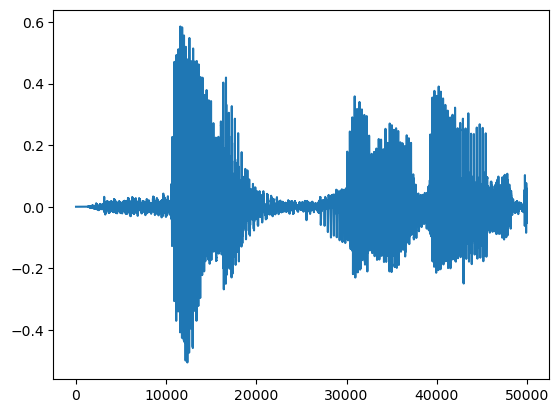

Perteneces al grupo de los Jóvenes


In [1]:
import os
import joblib
import numpy as np
import librosa.display
from scipy.stats import skew
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog, messagebox

# Cargar el modelo entrenado
Modelo_entrenado = joblib.load('D:\ADMIN\Music\Audios\Modelo_Audio.pkl')  # Reemplaza 'ruta_del_archivo' con la ubicación real del archivo

# Crear la ventana principal de tkinter
root = tk.Tk()

# Ocultar la ventana principal de tkinter
root.withdraw()

# Establecer el foco en la ventana principal de tkinter
root.focus_force()

# Abrir el cuadro de diálogo para seleccionar el archivo de audio
Nombre_archivo = filedialog.askopenfilename(title="Selecciona un archivo de audio")

# Cargar el archivo de audio
x, sr = librosa.load(Nombre_archivo)
X_New = np.resize(x, 50000)
plt.plot(X_New)
plt.show()

# Calcular características
audio = np.array(X_New)
Total_caracteristicas = 7
Matriz_caracteristica = np.zeros((1, Total_caracteristicas))

Varianza = np.var(audio)
Desviacion = np.std(audio)
rms_amplitude = np.sqrt(np.mean(np.square(audio)))
zero_crossings = np.where(np.diff(np.sign(audio)))[0]
zcr = len(zero_crossings)
skewness = skew(audio)
Magnitud, phase = librosa.magphase(librosa.stft(audio))
RMS_vector = librosa.feature.rms(S=Magnitud)
RMS = RMS_vector.mean()
Times_vector = librosa.times_like(RMS_vector)
Times = Times_vector.mean()

# Llenar la matriz de características
Matriz_caracteristica[0, 0] = Varianza
Matriz_caracteristica[0, 1] = Desviacion
Matriz_caracteristica[0, 2] = rms_amplitude
Matriz_caracteristica[0, 3] = zcr
Matriz_caracteristica[0, 4] = skewness
Matriz_caracteristica[0, 5] = RMS
Matriz_caracteristica[0, 6] = Times

# Realizar la predicción
Prediccion = Modelo_entrenado.predict(Matriz_caracteristica)
categories = ['Adultos', 'Ancianos', 'Infantes', 'Jóvenes']
print(f"Perteneces al grupo de los {categories[int(Prediccion[0])-1]}")

# Eliminar el archivo subido
# os.remove(Nombre_archivo)


In [11]:
import tkinter as tk
from tkinter import ttk
import pyaudio
import wave
import threading
import os
import numpy as np
import librosa.display
from scipy.stats import skew
import matplotlib.pyplot as plt
import joblib

# Variables globales para la configuración de audio
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
audio_data = b''
audio = None

def start_recording():
    global audio_data, audio
    audio_data = b''
    recording_label.config(text="Grabación iniciada...")

    # Iniciar un hilo para grabar audio
    threading.Thread(target=record_audio).start()

def record_audio():
    global audio_data, audio, recording
    try:
        audio = pyaudio.PyAudio()
        stream = audio.open(format=FORMAT, channels=CHANNELS,
                            rate=RATE, input=True,
                            frames_per_buffer=CHUNK)

        print("Recording...")
        recording = True
        while recording:
            data = stream.read(CHUNK)
            audio_data += data  # Agregar los datos de audio al buffer
    except Exception as e:
        print(f"Error during recording: {e}")
    finally:
        stream.stop_stream()
        stream.close()
        audio.terminate()


def stop_recording():
    global recording
    print("Recording stopped.")
    recording = False  # Cambia el estado para detener la grabación
    save_audio()
    recording_label.config(text="Grabación detenida")


def save_audio():
    global audio_data, audio, file_path
    # Carpeta donde se guardará el archivo de audio
    file_path = r'G:\Mi unidad\Semestre 8\ReconocimientoDePatrones\Semana 13\grabacion.wav'  # Carpeta de grabaciones proporcionada por el usuario
    #os.makedirs(output_folder, exist_ok=True)  # Crea la carpeta si no existe
    #file_path = os.path.join(output_folder, "grabacion.wav")
    with wave.open(file_path, 'wb') as wav_file:
        wav_file.setnchannels(CHANNELS)
        wav_file.setsampwidth(pyaudio.PyAudio().get_sample_size(FORMAT))
        wav_file.setframerate(RATE)
        wav_file.writeframes(audio_data)
    print("Audio saved in:", file_path)
    
    # Integrar el código de procesamiento del modelo aquí
    cargar_modelo(file_path)

# def mostrar_resultado(resultado):
#     global root
    # Función para mostrar el resultado en una ventana secundaria
#     resultado_window = tk.Toplevel(root)
#     resultado_window.title("Resultado del análisis")
    
    # Etiqueta para mostrar el resultado
#     resultado_label = ttk.Label(resultado_window, text=resultado)
#     resultado_label.pack()

# Hacer que la ventana secundaria sea modal para evitar que la ventana principal se cierre
#     resultado_window.grab_set()
#     resultado_window.focus_set()
#     resultado_window.wait_window()
    
#     resultado_label.config(text=resultado)
    
  
    

def cargar_modelo(file_path):
    global resultado
    # Cargar el modelo entrenado
    

    Nombre_archivo = file_path

    # Cargar el archivo de audio
    x, sr = librosa.load(Nombre_archivo, sr=None, res_type='kaiser_fast')
    X_New = np.resize(x, 1000000)

    # ----------------------------------------------------

    audio = np.array(X_New)
    Total_caracteristicas = 7
    Matriz_caracteristica = np.zeros((1, Total_caracteristicas))
    Modelo_entrenado = joblib.load('D:\ADMIN\Music\Audios\Modelo_Audio.pkl')
    # Calcular características
    Varianza = np.var(audio)
    Desviacion = np.std(audio)
    rms_amplitude = np.sqrt(np.mean(np.square(audio)))
    zero_crossings = np.where(np.diff(np.sign(audio)))[0]
    zcr = len(zero_crossings)
    skewness = skew(audio)
    Magnitud, phase = librosa.magphase(librosa.stft(audio))
    RMS_vector = librosa.feature.rms(S=Magnitud)
    RMS = RMS_vector.mean()
    Times_vector = librosa.times_like(RMS_vector)
    Times = Times_vector.mean()

    # Llenar la matriz de características
    Matriz_caracteristica[0, 0] = Varianza
    Matriz_caracteristica[0, 1] = Desviacion
    Matriz_caracteristica[0, 2] = rms_amplitude
    Matriz_caracteristica[0, 3] = zcr
    Matriz_caracteristica[0, 4] = skewness
    Matriz_caracteristica[0, 5] = RMS
    Matriz_caracteristica[0, 6] = Times

    # -----------------------------------------------------
    # Predicción
    prediccion = Modelo_entrenado.predict(Matriz_caracteristica)
    Etapa = ['Adultos', 'Ancianos', 'Infantes', 'Jóvenes']
    resultado = Etapa[int(prediccion[0])-1]
    mensaje_resultado = f"Perteneces al grupo de los {resultado}!"
    label_bienvenida.config(text=mensaje_resultado)
#     mostrar_resultado(resultado)
    print(prediccion)
    print(resultado)
    print(Etapa)
 
      

# Crear la ventana principal
root = tk.Tk()
root.title("Grabador de Audio")
root.geometry("300x200")

# Estilo personalizado para los botones
style = ttk.Style()
style.theme_use("clam")  # Selecciona un tema base

# Configura el estilo de los botones
style.configure('Custom.TButton',
                foreground='white',  # Color del texto
                background='#3498db',  # Color de fondo
                borderwidth='0',  # Ancho del borde
                focuscolor='#2980b9',  # Color del botón cuando está enfocado
                font=('Arial', 10),  # Fuente del texto
                relief='flat',  # Estilo del relieve del botón
                padding=10)  # Espaciado interno

# Establece un estilo personalizado para los botones
style.map('Custom.TButton',
          background=[('active', '#2980b9')],  # Cambia el color de fondo cuando el botón está activo
          relief=[('pressed', 'sunken')])  # Cambia el relieve del botón cuando está presionado

# Marco para organizar los widgets
frame = ttk.Frame(root)
frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

# Botones
record_button = ttk.Button(frame, text="Iniciar Grabación", command=start_recording, style='Custom.TButton')
record_button.pack(fill=tk.X, padx=5, pady=5)

stop_button = ttk.Button(frame, text="Detener Grabación", command=stop_recording, style='Custom.TButton')
stop_button.pack(fill=tk.X, padx=5, pady=5)

# boton_cerrar = ttk.Button(frame, text="Cerrar", command=root.destroy,style='Custom.TButton')
# boton_cerrar.pack(fill=tk.X, padx=5, pady=5)

# Etiqueta para mostrar el estado de la grabación
recording_label = ttk.Label(frame, text="")
recording_label.pack()

# Etiqueta para mostrar el resultado de la predicción
label_bienvenida = ttk.Label(frame, text="")
label_bienvenida.pack()

root.mainloop()

Recording...
Recording stopped.
Audio saved in: G:\Mi unidad\Semestre 8\ReconocimientoDePatrones\Semana 13\grabacion.wav
[0.]
Jóvenes
['Adultos', 'Ancianos', 'Infantes', 'Jóvenes']
